# This Notebook checks if the distribution is normal

First, Import modules

In [1]:
import os
import pandas as pd
from scipy import stats
import numpy as np
from scipy.stats.kde import gaussian_kde
from numpy import linspace
import matplotlib.pyplot as plt

%matplotlib inline


Read data file into pandas dataframe

In [2]:
data = pd.read_csv('data/Flow.csv')
col_names = data.columns


## The null hypothesis is that the data comes from a normal distribution (i.e if p_value < 0.05, the data comes from other distribution)

N.B: the data needs to have only two columns and the second column needs to hold the data (e.g precipitation, flow, etc.) and the first column is assumed to have date

In [3]:
stat = stats.normaltest(data.loc[:, col_names[1]])
p_value = stat[1]

if p_value < 0.05:
    print("\nThe data is not normaly distributed")
else:
    print("\nThe data is normaly distributed")


The data is not normaly distributed


## Plots
First let's generate n random normal distribution values with the same standard deviation and mean as the data

In [4]:

std = np.std(data.loc[:, col_names[1]])  # standard deviation
mean = np.mean(data.loc[:, col_names[1]])  # Average (mean) of the data
n = len(data.loc[:, col_names[1]])

# n randomly generated normal distribution values
random = np.random.normal(mean, std, n)

kde_r = gaussian_kde(random)
kde = gaussian_kde(data.loc[:, col_names[1]])  # for the data

# these are the values over wich your kernel will be evaluated
dist_space_r = linspace(min(random), max(random), n)
dist_space = linspace(min(data.loc[:, col_names[1]]), max(
    data.loc[:, col_names[1]]), n)  # for the data


Create the figure

<Figure size 432x288 with 0 Axes>

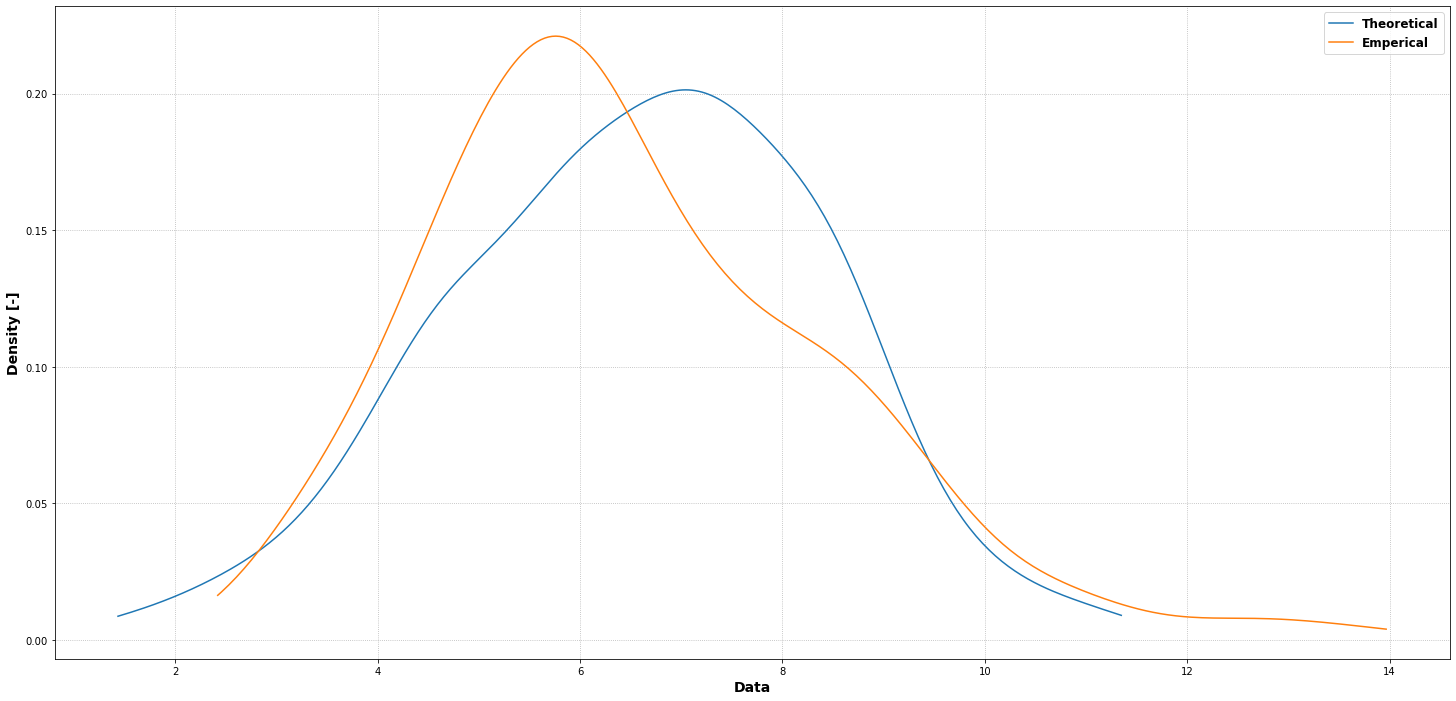

In [5]:
fig = plt.figure()

plt.figure(figsize=(25, 12))

plt.plot(dist_space_r, kde_r(dist_space_r), label='Theoretical')
plt.plot(dist_space, kde(dist_space), label='Emperical')

plt.ylabel('Density [-]', fontsize=14, fontweight='bold')
plt.xlabel('Data', fontsize=14, fontweight='bold')

legend_properties = {'weight': 'bold', 'size': 12}
plt.legend(prop=legend_properties, loc='best')
plt.grid(linestyle='dotted')

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 



<a href="https://www.youtube.com/embed/XfQE94iBsLw?list=PLK7YBpqQP_eMr_QiDLy1SudEgBG0rp4PU">Learn more Python Programming </a>

<iframe width="100%" height="auto" src="https://www.youtube.com/embed/XfQE94iBsLw?list=PLK7YBpqQP_eMr_QiDLy1SudEgBG0rp4PU" title="Python Videos" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture" allowfullscreen></iframe>